In [1]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

In [2]:
dogs = pd.read_csv('data/akc.csv')

kids = {1:"High", 2:"Medium", 3:"Low"}
dogs["kids"] = dogs['children'].map(kids)

(sec:eda_multi)=
# Comparisons in Multivariate Settings

When we examine a distribution or relationship, we often want to compare it
across subgroups of the data. This process of conditioning on additional
factors often leads to visualizations that involve three or more variables.
In this section, we explain how to read plots that are commonly used to
visualize multiple variables.

As an example, let's compare the relationship between height and
longevity across repetition categories. First, we collapse repetition
(the typical number of times it takes for a dog to learn a new command) 
from six categories into four: <15, 15-25, 25-40, and 40+:

In [3]:
rep_replacements = {
    '80-100': '40+', '40-80': '40+', 
    '<5': '<15', '5-15': '<15',
}
dogs = dogs.assign(
    repetition=dogs['repetition'].replace(rep_replacements))

Now each group has about 30 breeds in it, and having fewer categories makes it easier to decipher relationships. These categories are conveyed by different shaped symbols in a scatter plot: 

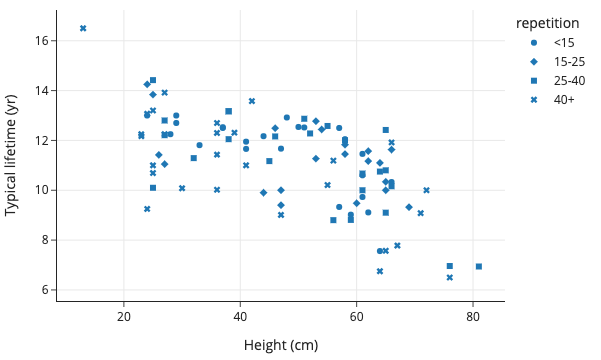

In [4]:
px.scatter(dogs.dropna(subset=['repetition']), x='height', y='longevity', 
           symbol='repetition', width=450, height=250,
           labels={'height':'Height (cm)', 'longevity':'Typical lifetime (yr)'},
          )

This plot would be challenging to interpret if there were
more levels within the `repetition` feature.

Facet plots offer an alternative approach to display these three features:

```python
px.scatter(dogs.dropna(subset=['repetition']), 
           x='height', y='longevity', trendline='ols', 
           facet_col='repetition', facet_col_wrap=2,
           labels={'height':'Height (cm)', 
                   'longevity':'Typical Lifespan (yr)'})
```

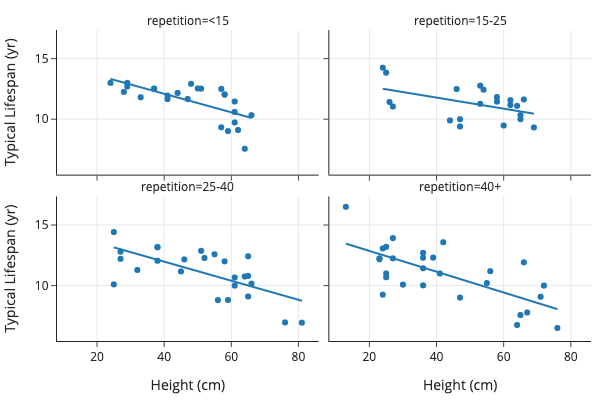

In [6]:
fig = px.scatter(dogs.dropna(subset=['repetition']), x='height', y='longevity', 
                 facet_col='repetition', facet_col_wrap=2, trendline='ols',
                width=450, height=400, 
                labels={'height':'Height (cm)', 'longevity':'Typical Lifespan (yr)'
                       })
margin(fig, t=30)
fig.show()

Each of the four scatter plots shows the relationship between longevity and height for a different range of repetitions.
By separating the scatter plots, we can better assess how the relationship between two
quantitative features changes across the subgroups. And, we can more easily see the range of
height and longevity for each repetition range.
We can see that the larger breeds tend to have shorter lifespans.
Another interesting feature is that the lines are similar in slope, but the line for the 40+ repetitions sits about 1.5 years below the others.
Those breeds tend to live about 1.5 years less on average than the other repetition categories  no matter the height.

We summarize the various plotting techniques for making comparisons when we have three (or more) features.  

Two Quantitative and One Qualitative
: We demonstrated this this case already with a scatter plot that varies the markers according to the qualitative feature's categories, or by the panels of scatter plots, with on for each category. 

Two Qualitative and One Quantitative Feature
: We have seen in the collections of box plots of height according to breed size that we can compare the basic shape of a distribution across
subgroups with side-by-side box plots. When we have two or more qualitative
features, we can organize the box plots into groups according to one of the
qualitative features.

Three Quantitative Features
: We can use a similar technique when we plotted two quantitative features and one qualitative. This time, we convert one of the quantitative features into an ordinal feature, where each category typically has roughly the same number of records. Then we make faceted scatter plots of the other two features. We again look for similarities in relationships across the facets.

Three Qualitative Features
: When we examine relationships between
qualitative features, we examine proportions of one feature within subgroups
defined by another. 
In the previous section, the three line plots in one figure and the side-by-side bar plots both display such comparisons. With three (or more) qualitative features, we can
continue to subdivide the data according to the combinations of levels of the features
and compare these proportions using line plots, dot charts, side-by-side bar charts, etc. 
But, these plots tend to get increasingly difficult to understand with further subdivisions.

:::{note}

It's good practice to break down a visualization to see whether a relationship changes for subgroups of the data determined by a qualitative feature. This technique is called *controlling for* a feature. You might get a surprise when for example, a linear relationship in a scatter plot that has an upward trend reverses to downward trends in some or all facets of the scatter plot. This phenomenon is known as *Simpson's Paradox*. The paradox can happen with qualitative features as well. A [famous case](https://pubmed.ncbi.nlm.nih.gov/29484824/) occurred at Berkeley when the admissions to graduate school for men was higher than for women, but when examined within each program the rates favored women. The issue was that women were applying in greater numbers to programs that had lower admission rates.   

:::

Comparisons that involve more than one categorical
variable can quickly become cumbersome as the number of possible combinations
of categories grows. For example, there are 3 × 4 = 12 size–repetitions
combinations (if we had kept the original categories for repetitions, we would
have 18 combinations). Examining a distribution across 12 subgroups can be
difficult. Further, we come up against the problem of having too few
observations in subgroups. Although, there are nearly 200 rows in the dogs
data frame, half of the size–repetition combinations have 10 or fewer
observations. (This is compounded by losing an observation when one feature has
a missing value.) This *curse of dimensionality* also arises when we compare
relationships with quantitative data. With just three quantitative variables,
some of the scatter plots in a facet plot can easily have too few observations
to confirm the shape of the relationship between two variables for the
subgroups.

Now that we've seen practical examples of visualizations that are commonly
used in exploratory data analysis, we proceed to discuss some high-level guidelines for EDA.